# Gráficas de Speedup para DBSCAN Paralelo

Este script genera gráficas de speedup para todos los tamaños de dataset y valida si cada versión paralela supera el speedup mínimo de 1.5.


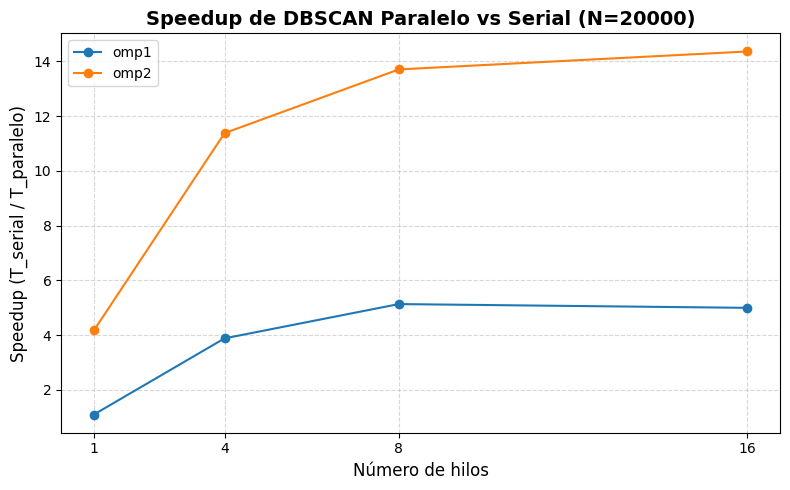

✅ omp1 (N=20000) supera 1.5 → speedup máximo: 5.13
✅ omp2 (N=20000) supera 1.5 → speedup máximo: 14.36


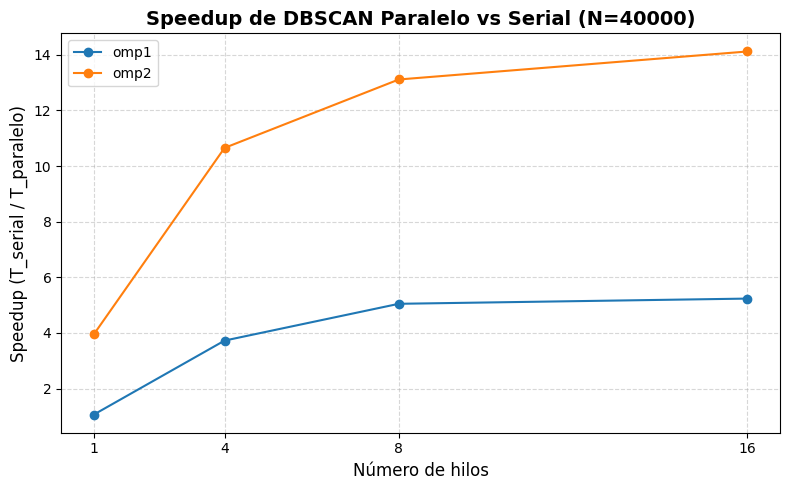

✅ omp1 (N=40000) supera 1.5 → speedup máximo: 5.24
✅ omp2 (N=40000) supera 1.5 → speedup máximo: 14.12


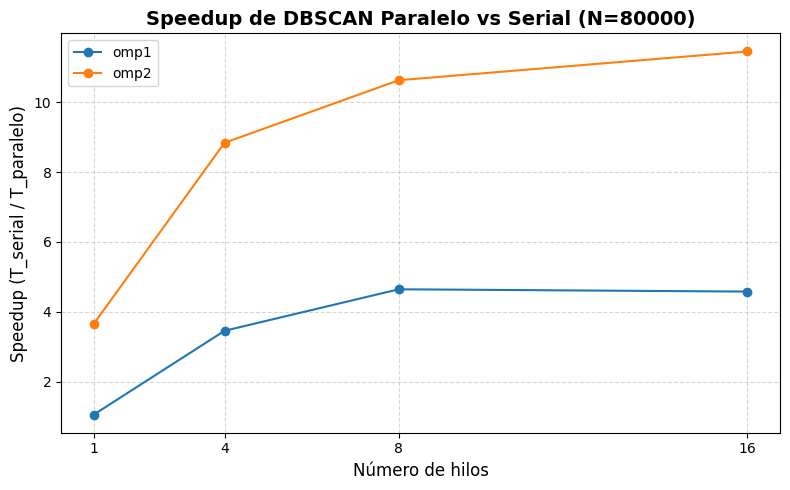

✅ omp1 (N=80000) supera 1.5 → speedup máximo: 4.64
✅ omp2 (N=80000) supera 1.5 → speedup máximo: 11.45


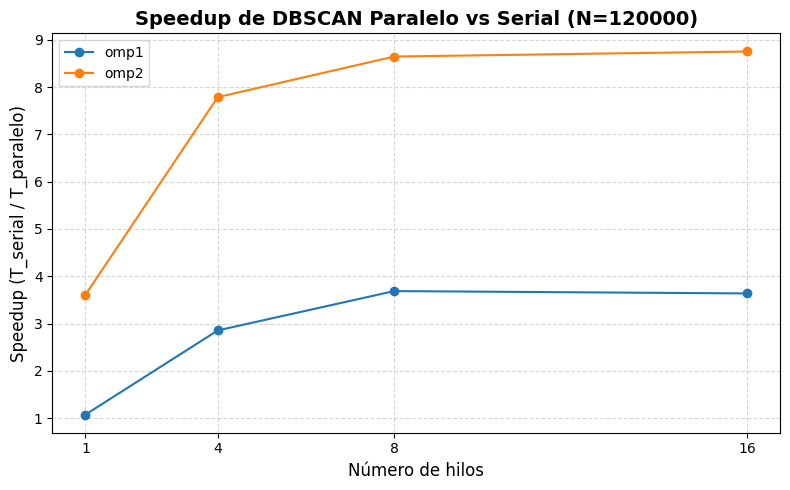

✅ omp1 (N=120000) supera 1.5 → speedup máximo: 3.69
✅ omp2 (N=120000) supera 1.5 → speedup máximo: 8.75


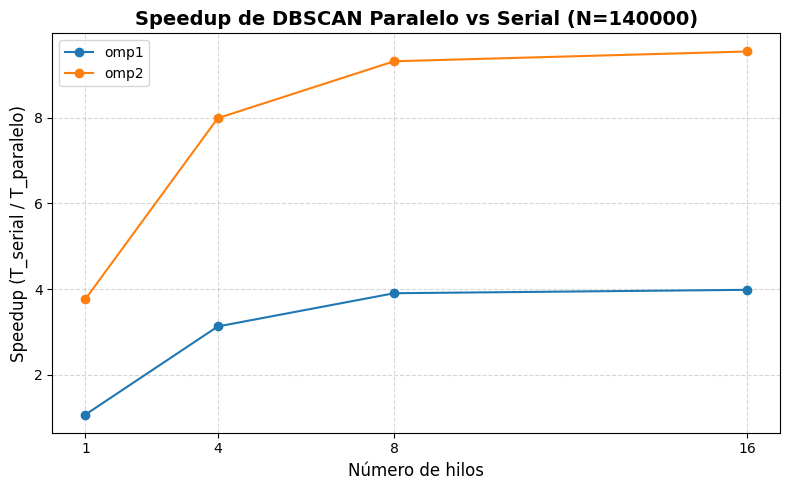

✅ omp1 (N=140000) supera 1.5 → speedup máximo: 3.98
✅ omp2 (N=140000) supera 1.5 → speedup máximo: 9.55


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Lista de tamaños de dataset
POINTS_LIST = [20000, 40000, 80000, 120000, 140000] #,, 160000, 180000, 200000]

# Iterar sobre cada tamaño de dataset
for N in POINTS_LIST:
    csv_file = f"output/{N}_results.csv"
    
    if not os.path.exists(csv_file):
        print(f"⚠️ Archivo {csv_file} no encontrado, se omite este tamaño.")
        continue
    
    # --- Cargar CSV ---
    df = pd.read_csv(csv_file)
    
    # --- Promedio por implementación y hilos ---
    avg_times = df.groupby(['impl', 'threads'])['time_s'].mean().reset_index()
    
    # --- Tiempo promedio de la versión serial ---
    serial_time = avg_times[avg_times['impl'] == 'serial']['time_s'].values[0]
    
    # --- Calcular speedup ---
    avg_times['speedup'] = serial_time / avg_times['time_s']
    
    # --- Filtrar solo paralelas ---
    parallel_df = avg_times[avg_times['impl'] != 'serial']
    
    # --- Graficar ---
    plt.figure(figsize=(8,5))
    for impl in parallel_df['impl'].unique():
        data = parallel_df[parallel_df['impl'] == impl]
        plt.plot(data['threads'], data['speedup'], marker='o', label=impl)
    
    plt.title(f"Speedup de DBSCAN Paralelo vs Serial (N={N})", fontsize=14, fontweight='bold')
    plt.xlabel("Número de hilos", fontsize=12)
    plt.ylabel("Speedup (T_serial / T_paralelo)", fontsize=12)
    plt.xticks(data['threads'])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # --- Validar speedup mínimo ---
    for impl in parallel_df['impl'].unique():
        max_speedup = parallel_df[parallel_df['impl'] == impl]['speedup'].max()
        if max_speedup < 1.5:
            print(f"⚠️ {impl} (N={N}) no supera 1.5 → penalización -50%")
        else:
            print(f"✅ {impl} (N={N}) supera 1.5 → speedup máximo: {max_speedup:.2f}")
